In [1]:

import scipy.io
import numpy as np
import matplotlib.pyplot as plt

### 1. Cargar archivo `.mat` con la señal EMG

In [2]:

# Cargar el archivo .mat (ajustar nombre si es necesario)
data = scipy.io.loadmat("M1_JUAN_VANEGAS.mat")

# Ver claves disponibles en el archivo
print(data.keys())

dict_keys(['data', 'datastart', 'dataend', 'titles', 'rangemin', 'rangemax', 'unittext', 'unittextmap', 'blocktimes', 'tickrate', 'samplerate', 'firstsampleoffset', 'comtext', 'com'])


In [11]:
# Revisar dimensiones y contenido del .mat completo
for k, v in data.items():
    if not k.startswith("__"):
        arr = np.asarray(v)
        print(f"{k}: shape={arr.shape}, dtype={arr.dtype}")

print("\n\nTitles:", data["titles"])

data: shape=(1, 136778), dtype=float32
datastart: shape=(4, 1), dtype=float64
dataend: shape=(4, 1), dtype=float64
titles: shape=(4,), dtype=<U7
rangemin: shape=(4, 1), dtype=float64
rangemax: shape=(4, 1), dtype=float64
unittext: shape=(1,), dtype=<U1
unittextmap: shape=(4, 1), dtype=float64
blocktimes: shape=(1, 1), dtype=float64
tickrate: shape=(1, 1), dtype=float64
samplerate: shape=(4, 1), dtype=float64
firstsampleoffset: shape=(4, 1), dtype=float64
comtext: shape=(2,), dtype=<U15
com: shape=(6, 5), dtype=float64


Titles: ['Int. Bi' 'Int. Tr' 'Biceps ' 'Triceps']


### 2. Extraer las variables necesarias 

In [3]:
# 2. Extraer variables necesarias
data_values = data["data"].flatten()
datastart = data["datastart"].flatten().astype(int)
dataend   = data["dataend"].flatten().astype(int)
titles    = [t.strip() for t in data["titles"].flatten()]

### 3. Seleccionar solo los canales de interés (Bíceps y Tríceps) 

In [4]:
# 3. Separar los canales usando start/end
signals = {}
for i, title in enumerate(titles):
    start, end = datastart[i], dataend[i]
    signals[title] = data_values[start-1:end]   # MATLAB usa índices base 1

### 4. Quedarnos solo con Bíceps y Tríceps

In [5]:
# 4. Quedarnos solo con Bíceps y Tríceps
biceps = signals["Biceps"]
triceps = signals["Triceps"]

print("Bíceps:", biceps.shape)
print("Tríceps:", triceps.shape)

Bíceps: (68389,)
Tríceps: (68389,)


### 5. Gráficar señales 

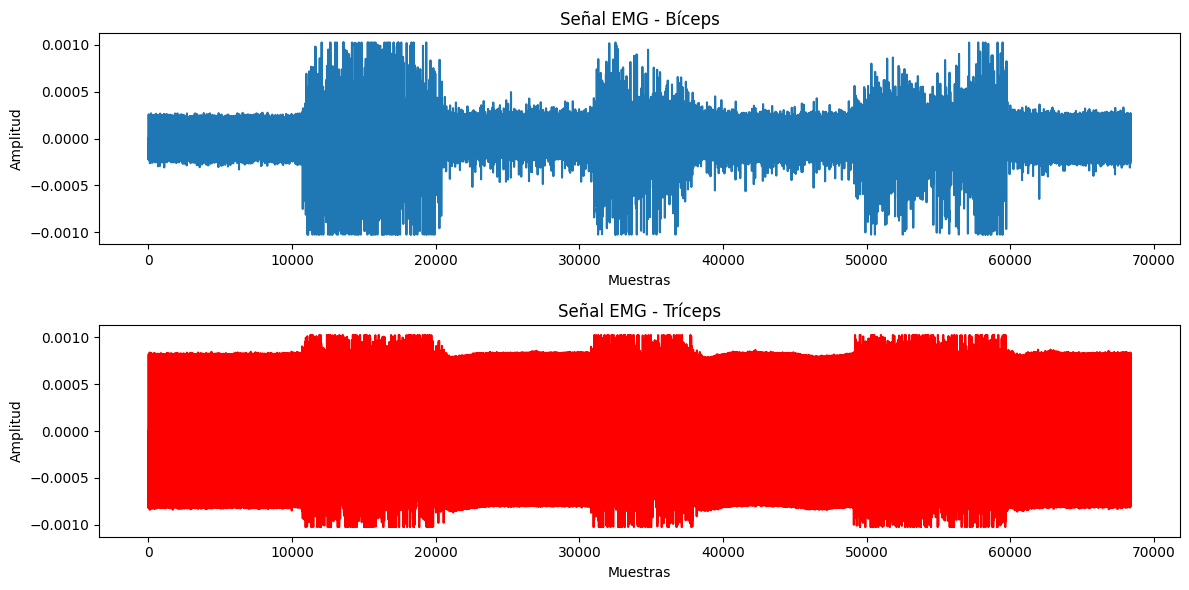

In [6]:
# 5. Graficar
t = np.arange(biceps.size)

plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(t, biceps)
plt.title("Señal EMG - Bíceps")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")

plt.subplot(2,1,2)
plt.plot(t, triceps, color="r")
plt.title("Señal EMG - Tríceps")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()